In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\David\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


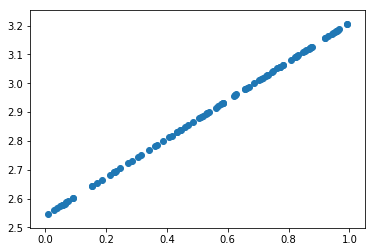

In [2]:
# create data of a line
X_train = np.random.rand(100).astype(np.float32)
Y_train = 0.67*X_train+2.54

plt.scatter(X_train, Y_train)
plt.show()

In [3]:
# begining of the tf strufcture
weight = tf.Variable(tf.random_uniform([1],-1.0,1.0))
bias = tf.Variable(tf.zeros([1]))

Y = weight*X_train+bias

loss = tf.reduce_mean(tf.square(Y - Y_train))

optimizer = tf.train.GradientDescentOptimizer(0.3)

train = optimizer.minimize(loss)
# we must initialize the tf structure before runing
init = tf.global_variables_initializer()
# end of the tf strufcture

At the 0ᵗʰ step
the weight = [1.0714197]
the bias = [1.7234467]
the loss = 0.36335888504981995
-----------------------------------------------
At the 60ᵗʰ step
the weight = [0.7380677]
the bias = [2.4993598]
the loss = 0.0003879896830767393
-----------------------------------------------
At the 120ᵗʰ step
the weight = [0.6770699]
the bias = [2.5357788]
the loss = 4.1857197174977046e-06
-----------------------------------------------
At the 180ᵗʰ step
the weight = [0.67073435]
the bias = [2.5395615]
the loss = 4.516244800356617e-08
-----------------------------------------------


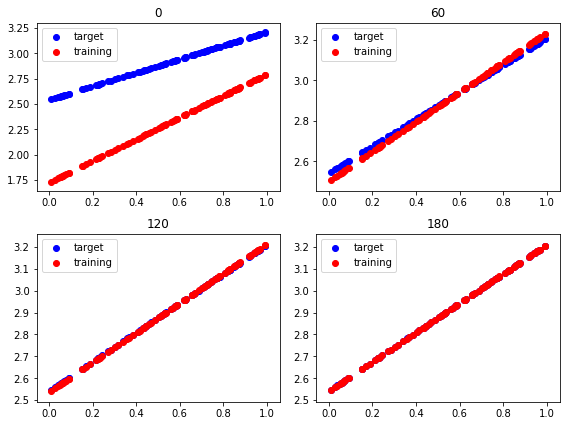

In [4]:
# we need to point at init at the begining
session = tf.Session()
session.run(init)

# initialize the figure setting
fig, axes = plt.subplots(2,2, sharex=False, sharey=False)
fig.set_figheight(6), fig.set_figwidth(8)
row, col = [0,0,1,1], [0,1,0,1]
i, j = 0,0

# do the optimization step by step 
for step in range(201):
    session.run(train) # note that in each step we point at the train
    if step % 60 == 0:
        slope, intercept, loss_fun = session.run(weight), session.run(bias), session.run(loss)
        print("At the {}ᵗʰ step\nthe weight = {}\nthe bias = {}\nthe loss = {}".format(step, slope, intercept, loss_fun))
        print("-----------------------------------------------")
        axes[row[i], col[j]].scatter(X_train, Y_train, c= 'b', label = 'target')
        axes[row[i], col[j]].scatter(X_train, slope[0]*X_train + intercept[0], c = 'r', label = 'training')
        axes[row[i], col[j]].legend(loc = 2)
        axes[row[i], col[j]].set_title(step)
        i+=1
        j+=1
        
plt.tight_layout(True)
plt.show()